<a href="https://colab.research.google.com/github/eunzzae/Off_Study_ML/blob/main/230926_ML_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89__%EC%83%9D%EC%A1%B4%EC%9E%90%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# 파일 불러오기
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanic/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/titanic/gender_submission.csv')

0    549
1    342
Name: Survived, dtype: int64

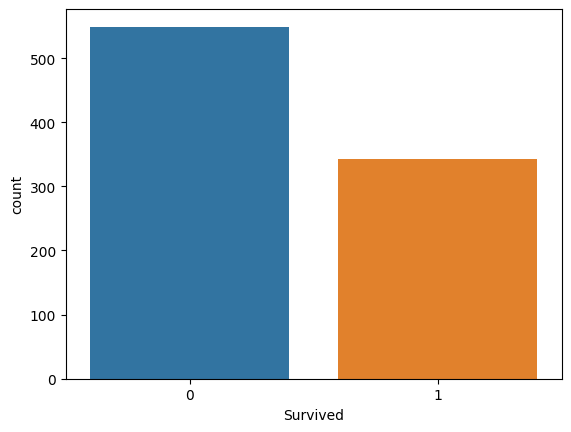

In [33]:
# 1. 결측치 체크
# train.info()
train[train.isnull().any(axis=1)] # 결측치를 포함한 모든 row 체크

# 2. dtype이 Object인 column 찾기 - 분석이 필요 없는 컬럼인지, 필요한 내용인데 문자열로 되어있는지를 체크
# train.dtypes == 'object' # column 별로 true, false를 가지는 mask 생성
train.loc[:, train.dtypes == 'object'] # dataframe을 만들고 싶을 때
# train.columns[train.dtypes == 'object'] # columns만 뽑고 싶을 때

# 3. target value distribution 체크
sns.countplot(data=train, x='Survived')
train.Survived.value_counts()

# Feature Engineering

In [34]:
# 1. Cabin column의 결측치 여부가 Survived에 영향이 있는가?
train.loc[train.Cabin.isnull(), 'Survived'].mean(), train.loc[train.Cabin.notnull(), 'Survived'].mean()


# 2. Cabin이 Survived에 영향이 있는 것 같으니, Cabin 값이 있으면 1, 없으면 0 값을 가지는 is_Cabin이라는 column을 만들자
train['is_Cabin'] = train.Cabin.notnull() * 1
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [35]:
# 3. SibSp + Parch = FamilySize
train['FamilySize'] = train['SibSp'] + train['Parch']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_Cabin,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [36]:
# 4. drop columns
train = train.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Cabin', 'Ticket'])

In [37]:
# 5. Age column
train.Age = train.Age.fillna(train.Age.median())
# train.Age.mean(), train.Age.min(), train.Age.max(), train.Age.median(), train.Age.mode()


In [38]:
# 6. dropna
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    object 
 3   Age         889 non-null    float64
 4   Fare        889 non-null    float64
 5   Embarked    889 non-null    object 
 6   is_Cabin    889 non-null    int64  
 7   FamilySize  889 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [40]:
# 7. Encoding categorical feature

# 1) Ordinal encoding
# factorize
train.Sex = pd.factorize(train.Sex, sort=True)[0] # 데이터 순서를 일정하게 해주기 위해 sort지정

# _map
# _map = {'male' : 0, 'female' : 1}
# train.Sex.map(_map)

# 2) One-hot encoding
train = pd.get_dummies(data=train, columns=['Embarked'])
train

,Survived,Pclass,Sex,Age,Fare,is_Cabin,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,0,1,0,0,1
1,1,1,0,38.0,71.2833,1,1,1,0,0
2,1,3,0,26.0,7.9250,0,0,0,0,1
3,1,1,0,35.0,53.1000,1,1,0,0,1
4,0,3,1,35.0,8.0500,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,0,0,0,0,1
887,1,1,0,19.0,30.0000,1,0,0,0,1
888,0,3,0,28.0,23.4500,0,3,0,0,1
889,1,1,1,26.0,30.0000,1,0,1,0,0


# training

In [43]:
# data setting for training
from sklearn.model_selection import train_test_split

X = train.drop(columns=['Survived']) # feature vector
y = train.Survived # target value

# 트테트테
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(711, 9) (178, 9) (711,) (178,)


In [44]:
# training(=fitting)
# sklearn에서 학습을 하는 방법
# 1. 사용할 함수를 불러온다.
# 2. 해당 함수를 선언한다.
# 3. fit()

from sklearn.linear_model import LinearRegression, LogisticRegression

reg = LinearRegression()
reg.fit(X, y)

lreg = LogisticRegression()
lreg.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [52]:
# 회귀 성능 비교
from sklearn.metrics import mean_squared_error # MSE

print("Linear Regression MSE : %.4f" % mean_squared_error(y_train, reg.predict(X_train)))
print("Logistic Regression MSE : %.4f" % mean_squared_error(y_train, lreg.predict_proba(X_train)[:, 1]))


Linear Regression MSE : 0.1416
Logistic Regression MSE : 0.1392


In [ ]:
## To-Do : test 데이터를 X_test로 가공해서 lreg.predict(X_test)가 에러가 나지않고 출력이 되게끔 만들자

X_test =
lreg.predict(X_test)